# 1. Installing and importing relevant libraries

In [37]:
!pip3 install xgboost
!pip3 install wordcloud
import zipfile
import nltk
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

You should consider upgrading via the 'c:\users\yiehy\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\yiehy\anaconda3\python.exe -m pip install --upgrade pip' command.


In [68]:
import zipfile

In [71]:
with zipfile.ZipFile("./Fake_Data.zip", 'r') as zip_ref:
    zip_ref.extractall("./")
with zipfile.ZipFile("./True_Data.zip", 'r') as zip_ref:
    zip_ref.extractall("./")
true_df = pd.read_csv("./True_Data/True.csv")
fake_df = pd.read_csv("./Fake_Data/Fake.csv")
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## 2. Exploratory Data Analysis

In [39]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


In [40]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [41]:
#concatenate true and fake df
# True == 1 , fake == 0
true_df["label"] = 1
fake_df["label"] = 0
frames = [true_df, fake_df]
combined_df = pd.concat(frames)
combined_df.head()
# combined_df.tail()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Great, we can see that there are no null values within columns across both dataset, and a total of 23841 records for fake news, and 21417 records for true. The dataset is relatively balanced.

Let's next take a look at the whether there are duplicate values 

In [42]:
print("********** fake news dataset **********")
print(f"Number of unique titles: "+str(fake_df["title"].nunique()))
print(f"Number of unique text: " +str(fake_df["text"].nunique()))
print(f"Number of unique subjects:" +str(fake_df["subject"].nunique()))
print("\n")
print("********** true news dataset **********")
print(f"Number of unique titles: "+str(true_df["title"].nunique()))
print(f"Number of unique text: " +str(true_df["text"].nunique()))
print(f"Number of unique subjects:" +str(true_df["subject"].nunique()))

********** fake news dataset **********
Number of unique titles: 17903
Number of unique text: 17455
Number of unique subjects:6


********** true news dataset **********
Number of unique titles: 20826
Number of unique text: 21192
Number of unique subjects:2


In [43]:
print("True news subjects: ")
print(true_df["subject"].unique())
print("\n")
print("Fake news subjects: ")
print(fake_df["subject"].unique())

True news subjects: 
['politicsNews' 'worldnews']


Fake news subjects: 
['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [44]:
combined_df = combined_df.loc[:,["text","label"]]
combined_df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Wordcloud for text for true news


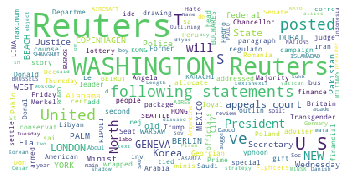

In [45]:
print("Wordcloud for text for true news")
wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(true_df['text']))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

Wordcloud for text for fake news


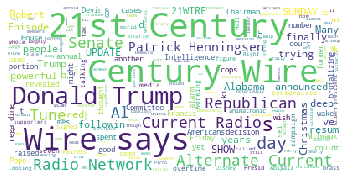

In [46]:
print("Wordcloud for text for fake news")
wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(fake_df['text']))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# 3. Preprocessing

In [47]:
lemmatizer = WordNetLemmatizer()

In [48]:
test_article = combined_df.iloc[0,0]
test_article

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [49]:
contraction_map = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}

## 3.1. Lowercasing

In [50]:
def uncapitalize(article):
    return article.lower()

## 3.2 Expanding abbreviations

In [51]:
def expand_abbr(article):
    new_article = article
    for item in contraction_map:
        if item in article:
            new_article = article.replace(item,contraction_map[item])
    return new_article

## 3.3 Removing stopwords

In [52]:
def remove_stopwords(article):
    word_tokens = word_tokenize(article)
    filtered_article = []
    for tok in word_tokens:
        if tok not in STOP_WORDS:
            filtered_article.append(lemmatizer.lemmatize(tok))
#     filtered_article = [w for w in word_tokens if not w in stop_words]
    return filtered_article

In [53]:
all_punctuation = set(string.punctuation)
all_punctuation.add("...")
all_punctuation.add('’')
all_punctuation.add('-')
all_punctuation.add('“')
all_punctuation.add('[')
all_punctuation.add(']')

## 3.4 Removing punctuation

In [54]:
def remove_punctuation(token_list):
    new_list = []
    for tok in token_list:
        if tok not in all_punctuation:
            new_list.append(tok)
    return new_list

In [55]:
combined_df["text"] = combined_df["text"].apply(uncapitalize)
combined_df["text"] = combined_df["text"].apply(expand_abbr)
combined_df["text"] = combined_df["text"].apply(remove_stopwords)
combined_df["text"] = combined_df["text"].apply(remove_punctuation)

In [56]:
combined_df["text"] = combined_df["text"].apply(lambda x:" ".join(x))

Wordcloud for text after removing stopwords


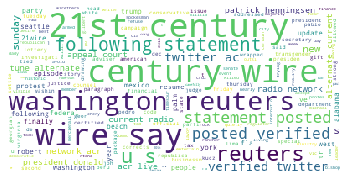

In [57]:
print("Wordcloud for text after removing stopwords")
wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(combined_df['text']))

plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [58]:
combined_df.head()

,text,label
0,washington reuters head conservative republica...,1
1,washington reuters transgender people allowed ...,1
2,washington reuters special counsel investigati...,1
3,washington reuters trump campaign adviser geor...,1
4,seattle/washington reuters president donald tr...,1


In [59]:
X = combined_df["text"]
y = combined_df["label"]

# 4. Getting our train and test sets (TF-IDF vectors)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# 5. ML models and evaluation (F1-score, Accuracy, AUC)

In [61]:
AUC_dict = {}
print("**********Naive Bayes**********")
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred = nbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
nb_probs = nbc.predict_proba(X_test)[:,1]
nb_auc = roc_auc_score(y_test,nb_probs)
print(f"ROC AUC: {nb_auc}")
AUC_dict["Naive Bayes"] = nb_auc
print("\n")

print("**********Logistic Regression**********")
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
lr_probs = lrc.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test,lr_probs)
print(f"ROC AUC: {lr_auc}")
AUC_dict["Logistic Regression"] = lr_auc
print("\n")

print("**********Random Forest Classifier**********")
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
rf_probs = rfc.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test,rf_probs)
print(f"ROC AUC: {rf_auc}")
AUC_dict["Random Forest"] = rf_auc
print("\n")

print("**********XGB Classifier**********")
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
xgb_probs = xgbc.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test,xgb_probs)
print(f"ROC AUC: {xgb_auc}")
AUC_dict["XGBoost"] = xgb_auc
print("\n")

print("**********Linear SVC**********")

svc = LinearSVC()
svc_clf = CalibratedClassifierCV(svc)
svc.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_probs = svc_clf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
print(f"F1 score: {f1score}")
print(f"Accuracy: {accuracy}")
svc_auc = roc_auc_score(y_test,svc_probs)
print(f"ROC AUC: {svc_auc}")
AUC_dict["Linear SVC"] = svc_auc


**********Naive Bayes**********
F1 score: 0.9259623489744311
Accuracy: 0.9288654923398799
ROC AUC: 0.9595488102907975


**********Logistic Regression**********
F1 score: 0.9906515779855205
Accuracy: 0.9910238239859621
ROC AUC: 0.9988243077748596


**********Random Forest Classifier**********
F1 score: 0.9981679819616684
Accuracy: 0.9982452588243235
ROC AUC: 0.9998285657967501


**********XGB Classifier**********
F1 score: 0.9975353848320541
Accuracy: 0.9976378484173585
ROC AUC: 0.9998448824344277


**********Linear SVC**********
F1 score: 0.9954986636657758
Accuracy: 0.9956806371060268
ROC AUC: 0.9992751689611559


# 6. Plotting ROC curve

In [62]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)

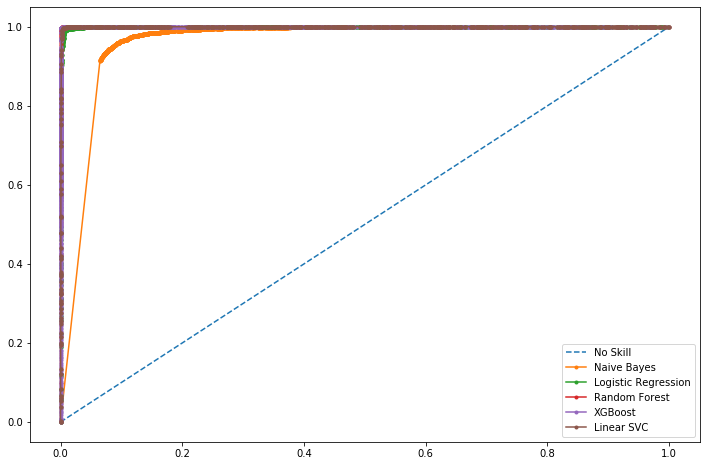

In [63]:
plt.figure(figsize=(12,8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label="No Skill")
plt.plot(nb_fpr, nb_tpr, marker='.', label="Naive Bayes")
plt.plot(lr_fpr, lr_tpr, marker='.', label="Logistic Regression")
plt.plot(rf_fpr, rf_tpr, marker='.', label="Random Forest")
plt.plot(xgb_fpr, xgb_tpr, marker='.', label="XGBoost")
plt.plot(svc_fpr, svc_tpr, marker='.', label="Linear SVC")
plt.legend()

# 7. Conclusion

<BarContainer object of 5 artists>

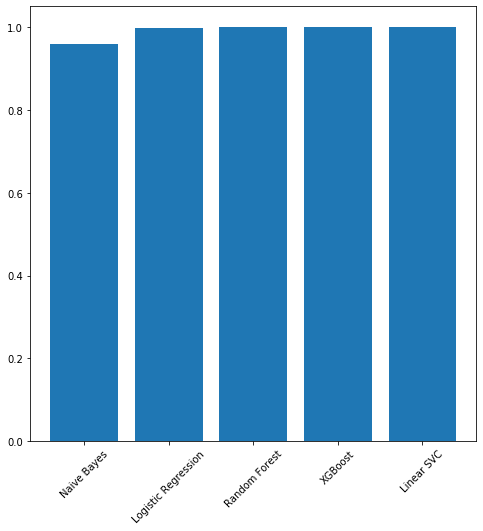

In [64]:
auc_keys = AUC_dict.keys()
auc_values = AUC_dict.values()
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
plt.bar(auc_keys, auc_values)

In [65]:
AUC_dict_sorted = {k: v for k, v in sorted(AUC_dict.items(), key=lambda item: item[1], reverse=True)}

In [66]:
i=1
for k,v in AUC_dict_sorted.items():
    print(f"{i} place: {k} -> AUC = {v}")
    i+=1

1 place: XGBoost -> AUC = 0.9998448824344277
2 place: Random Forest -> AUC = 0.9998285657967501
3 place: Linear SVC -> AUC = 0.9992751689611559
4 place: Logistic Regression -> AUC = 0.9988243077748596
5 place: Naive Bayes -> AUC = 0.9595488102907975
